In [4]:
# Plot ad hoc mnist instances
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import math
from scipy.optimize import minimize

In [10]:
# load (downloaded if needed) the Kaggle dataset
train = pd.read_csv('./datasets/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test = pd.read_csv('./datasets/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = (train.iloc[:,1:].values.astype('float32'))
y_train = (train.iloc[:,0].values.astype('int32'))
X_test = test.values.astype('float32')

In [22]:
class Neural_Network:
    #The Neural_Network class we use to store all the values that
    #will be used to teach our model to start recognizing handwritten
    #digits
    def __init__(self,X,y):
        self.m = X.shape[0]
        self.input_layer_size = X.shape[1]
        self.hidden_layer_size = 25
        self.output_layer_size = 10
        self.epsilon = []
        self.J = 0
        self.grad = 0
        self.num_labels = 10
        self.lambda1 = 0
        self.iter = 0
    #This is used to define some variables we will use through the
    #class that will remain constant such as the hidden_layer_size,
    #output_layer_size and the num_labels.
        
    def randInit(self):
        theta1 = []
        theta2 = []
        for x in range(2):
            if(x == 0):
                L_in = self.input_layer_size
                L_out = self.hidden_layer_size
            if(x == 1):
                L_in = self.hidden_layer_size
                L_out = self.output_layer_size
            self.epsilon.append(math.sqrt(6) / math.sqrt(L_in + L_out))
            
        X_bias = self.input_layer_size + 1
        
        theta1 = (np.random.rand(self.hidden_layer_size,
                 self.input_layer_size + 1) * (2 * self.epsilon[0])
                 - self.epsilon[0])
        theta2 = (np.random.rand(self.output_layer_size,
                  self.hidden_layer_size + 1) * (2 * self.epsilon[1])
                  - self.epsilon[1]) 
        return theta1,theta2
    #This functions goes about creating our theta variables that will
    #help the Neural Network to best fit the images and we will be using
    #the cost function to better fit these variables, this is function
    #is just used to first initalize it
    
    
    def sigmoid(self,z):        
        g = 1.0 / (1.0 + np.exp(-z))
        return g
    
    def sigmoidGradient(self,z):
        g = 1.0 / (1.0 + np.exp(-z))
        g = g*(1-g)
        return g
    
    def nnCostFunction(self,nn_params, input_layer_size, hidden_layer_size, \
                       num_labels, X, y, lambda_reg):
        
        self.J = 0;
        self.iter+=1;
        self.lambda1 = lambda_reg

        
        theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], \
                     (hidden_layer_size, input_layer_size + 1), order='F')

        theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):], \
                     (num_labels, hidden_layer_size + 1), order='F')
        
        Theta1_grad = np.zeros( theta1.shape )
        Theta2_grad = np.zeros( theta2.shape )
        
        a1 = np.column_stack((np.ones((self.m,1)), X))
        
        z2 = np.dot(a1, theta1.T)
        
        a2 = self.sigmoid(z2)
        
        a2 = np.column_stack((np.ones((a2.shape[0],1)), a2))
        
        z3 = np.dot(a2, theta2.T)
        
        a3 = self.sigmoid(z3)

        numLabels_temp = y
    
        yMatrix = y
        yMatrix = np.zeros((self.m,self.num_labels))
        
        for i in range(self.m):
            yMatrix[i, numLabels_temp[i]-1] = 1
             
        cost = 0
        
        for i in range(self.m):
            cost +=  np.sum( yMatrix[i] * np.log(a3[i]) + (1 - yMatrix[i]) * np.log(1 - a3[i]) )
            
        sqTheta1 = np.sum(np.sum(theta1[:,1:]**2))
        sqTheta2 = np.sum(np.sum(theta2[:,1:]**2))
        
        self.J = -(1.0/self.m) * cost
        
        self.J = self.J + ( (lambda_reg/(2.0*self.m)) *(sqTheta1 + sqTheta2) )
            
        print( str(self.iter) + ") ",self.J," cost")
        
        #Back Prop
        delta1 = 0;
        delta2 = 0; 
        for t in range(0,self.m):
            #print(a1.shape)
            a1_t = a1[t,]
            
            a2_t = a2[t,].T
            
            a3_t = a3[t,].T
            
            y_output_t = yMatrix[t,].T
            
            delta3_t = (a3_t - y_output_t);
            
            z2_t = np.dot(a1_t, theta1.T);
            z2_t= np.insert(z2_t,0 ,1, axis=0)
            
            delta2_t = np.dot(theta2.T, delta3_t) * self.sigmoidGradient(z2_t)
            
            delta2_t = delta2_t[1:]
            
            delta2 = delta2 + np.outer(delta3_t, a2_t)
            delta1 = delta1 + np.outer(delta2_t, a1_t.T)
        
        Theta1_grad = delta1 / self.m
        Theta2_grad = delta2 / self.m
        
        Theta1_grad_unregularized = np.copy(Theta1_grad)
        Theta2_grad_unregularized = np.copy(Theta2_grad)
        Theta1_grad += (float(self.lambda1)/self.m)*theta1
        Theta2_grad += (float(self.lambda1)/self.m)*theta2
        Theta1_grad[:,0] = Theta1_grad_unregularized[:,0]
        Theta2_grad[:,0] = Theta2_grad_unregularized[:,0]
        self.grad = np.concatenate((Theta1_grad.reshape(Theta1_grad.size, order='F'), Theta2_grad.reshape(Theta2_grad.size, order='F')))
        #print(Theta2_grad)
        return self.J,self.grad
        
    def train(self,theta1,theta2,nn_params, X, y, lambda_reg):
        print(self.J)
        print('Training Neural Network...')
        maxiter = 20
        #maxiter = 30
        #maxiter = 60
        #maxiter = 5
        #lambda_reg = 0
        nn_params = np.concatenate((theta1.reshape(theta1.size, order='F'), theta2.reshape(theta2.size, order='F')))
        myargs = (self.input_layer_size, self.hidden_layer_size, self.num_labels, X, y, lambda_reg)
        results = minimize(self.nnCostFunction, x0=nn_params, args=myargs, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)

        nn_params = results["x"]

        # Obtain Theta1 and Theta2 back from nn_params
        Theta1 = np.reshape(nn_params[:self.hidden_layer_size * (self.input_layer_size + 1)], \
                         (self.hidden_layer_size, self.input_layer_size + 1), order='F')

        Theta2 = np.reshape(nn_params[self.hidden_layer_size * (self.input_layer_size + 1):], \
                         (self.num_labels, self.hidden_layer_size + 1), order='F')

        print('Program paused. Press enter to continue.\n')
        return Theta1,Theta2
        
    def predict(self,Theta1, Theta2, X):
    #PREDICT Predict the label of an input given a trained neural network
    #   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
    #   trained weights of a neural network (Theta1, Theta2)

        # turns 1D X array into 2D
        if X.ndim == 1:
            X = np.reshape(X, (-1,X.shape[0]))

        # Useful values
        m = X.shape[0]
        num_labels = Theta2.shape[0]

        # You need to return the following variables correctly 
        p = np.zeros((m,1))

        h1 = self.sigmoid( np.dot( np.column_stack( ( np.ones((m,1)), X ) ) , Theta1.T ) )
        h2 = self.sigmoid( np.dot( np.column_stack( ( np.ones((m,1)), h1) ) , Theta2.T ) )

        p = np.argmax(h2, axis=1)

        # =========================================================================

        return p + 1# offsets python's zero notation
        
        
        


        

In [23]:
nn = Neural_Network(X_train,np.transpose(y_train))
theta1 = theta2 = []
theta1,theta2 = nn.randInit()
print(theta1.shape)
print(theta2.shape)
print(X_train.shape[1])

Hey
42000


<bound method Neural_Network.temp of <__main__.Neural_Network object at 0x7f9fb775dc18>>

In [8]:
#nn_params = np.concatenate((theta1.reshape(theta1.size, order='F'), theta2.reshape(theta2.size, order='F')))
#(nn.nnCostFunction(nn_params,X_train.shape[1],25,10,X_train,np.transpose(y_train),0.08))

In [9]:
nn_params = np.concatenate((theta1.reshape(theta1.size, order='F'), theta2.reshape(theta2.size, order='F')))
print(y_train.shape)
#nn.nnCostFunction(0,0,0,0,X_train,np.transpose(y_train),0)
theta1,theta2 = nn.train(theta1,theta2,nn_params,X_train,np.transpose(y_train),0.08)
pred = nn.predict(theta1, theta2, X_train)


(42000,)
0
Training Neural Network...
1)  7.670493894489202  cost


/home/keanu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp


2)  4.886844778441645  cost


/home/keanu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in exp


3)  3.6949972323787206  cost
4)  3.1812372158609845  cost
5)  3.109691509296329  cost
6)  3.0493311867247086  cost
7)  3.0401723843094173  cost
8)  2.9430587712380176  cost
9)  4.072268298758855  cost
10)  2.861945581109154  cost
11)  2.7854896431619576  cost
12)  2.680711047423485  cost
13)  2.5770806036624005  cost
14)  2.439310709588484  cost
15)  2.1874055465244733  cost
16)  1.9912873378767086  cost
17)  1.8217236663632888  cost
18)  1.766164339004701  cost
19)  1.712853666857538  cost
20)  1.6566033551392412  cost
21)  1.5977408769413586  cost
22)  1.5514883110483269  cost
23)  1.5033656746678916  cost
24)  1.438536654846722  cost
Program paused. Press enter to continue.



In [7]:
k = 0
print(pred[k])
for i in pred:
    if(i == 10):
        pred[k] = 0
    k+=1
print('Training Set Accuracy: {:f}'.format( ( np.mean(pred == y_train)*100 ) ) )

1
Training Set Accuracy: 76.257143


In [8]:
ans = nn.predict(theta1,theta2, X_test)
print(ans.shape)
print(type(ans))


(28000,)
<class 'numpy.ndarray'>


/home/keanu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp


In [9]:
k = 0
print(ans[1])
for i in ans:
    if(i == 10):
        ans[k] = 0
    k+=1
print(ans[1])

10
0


In [11]:
df = pd.DataFrame(data=ans,columns=["Label"])
file = "submission0.csv"
df.reset_index(level=0, inplace=True)
#df['ImageId'] = df.index
df.columns = ['ImageId', 'Label']
for i in df['ImageId']:
    df['ImageId'][i]+=1
#for
print(df[:5])
df.to_csv(file, index=False)

   ImageId  Label
0        1      2
1        2      0
2        3      8
3        4      4
4        5      2


2


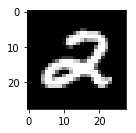

In [12]:
digit = X_test.reshape(X_test.shape[0],28,28)
print(ans[0])
plt.subplot(221)
plt.imshow(digit[i], cmap=plt.get_cmap('gray'))